# Calc Simple moving average
#### Source: https://www.datacamp.com/community/tutorials/moving-averages-in-pandas

In [76]:
# requirement
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
# get stock information of Tesla(TSLA), period = 3 months
tsla = yf.Ticker("TSLA")
hist = tsla.history(period="3mo")

# new df=sma, with 4 columns: open, high, low and close stock value
sma = hist.iloc[:,0:4]


In [78]:
# 1, 3, 10 days simple moving average (SMA), using close value
sma['sma_1'] = sma.iloc[:, 3].rolling(window=1).mean()
sma['sma_3'] = sma.iloc[:, 3].rolling(window=3).mean()
sma['sma_10'] = sma.iloc[:, 3].rolling(window=10).mean()

# checker
print('There are :', sma.shape[0], 'datapoints')


There are : 64 datapoints


In [79]:
# Compare sma 3 days vs sma 10 days, by 3 - 10
sma['sma3_10'] = sma['sma_3'] - sma['sma_10']

calc = []
for row in sma['sma3_10']:
    if row > 0: # if 3 > 10, upward trend
        calc.append('1')
    elif row < 0: # if 3 < 10, downward trend
        calc.append('-1')
    elif row is 0: # 3 = 10, no change trend
        calc.append('0')
    else: 
        calc.append('NaN')
sma['updown'] = calc
sma['updown'] = sma.updown.astype(float)

In [80]:
# sign of buy and sell

sma['cross'] = sma['updown'].diff()
logic = []
for row in sma['cross']:
    if row  < 0:
        logic.append('sell')
    elif row > 0:
        logic.append('buy')
    else:
        logic.append('shower and sleep')
sma['sign'] = logic

sma.tail(50)

,Open,High,Low,Close,sma_1,sma_3,sma_10,sma3_10,updown,cross,sign
Date,,,,,,,,,,,
2020-03-26,547.39,560.00,512.25,528.16,528.16,524.136667,464.498,59.638667,1.0,0.0,shower and sleep
2020-03-27,505.00,525.80,494.03,514.36,514.36,527.256667,461.272,65.984667,1.0,0.0,shower and sleep
2020-03-30,510.26,516.65,491.23,502.13,502.13,514.883333,466.978,47.905333,1.0,0.0,shower and sleep
2020-03-31,501.25,542.96,497.00,524.00,524.00,513.496667,476.358,37.138667,1.0,0.0,shower and sleep
2020-04-01,504.00,513.95,475.10,481.56,481.56,502.563333,488.392,14.171333,1.0,0.0,shower and sleep
2020-04-02,481.03,494.26,446.40,454.47,454.47,486.676667,491.075,-4.398333,-1.0,-2.0,sell
2020-04-03,509.50,515.49,468.39,480.01,480.01,472.013333,496.323,-24.309667,-1.0,0.0,shower and sleep
2020-04-06,511.20,521.00,497.96,516.24,516.24,483.573333,504.518,-20.944667,-1.0,0.0,shower and sleep
2020-04-07,545.00,565.00,532.34,545.45,545.45,513.900000,508.563,5.337000,1.0,2.0,buy


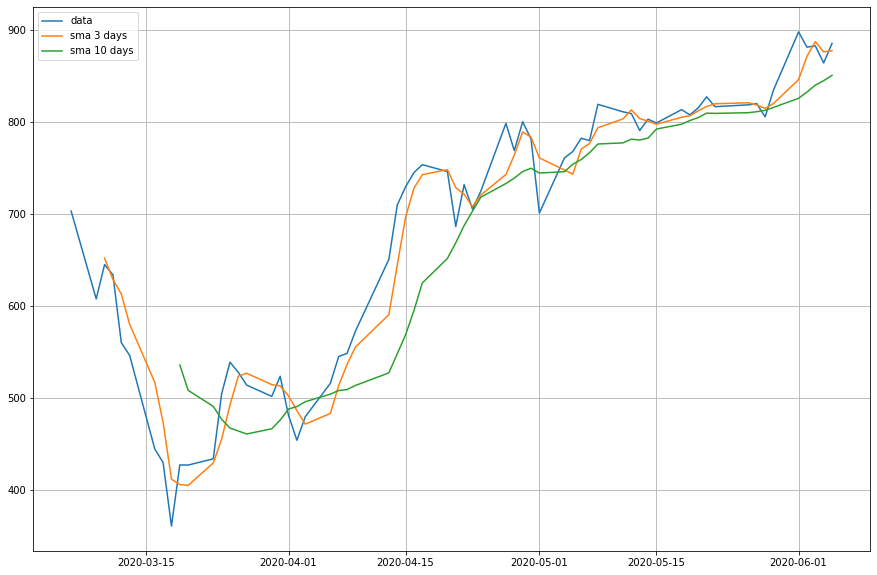

In [81]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(sma['Close'],label='data')
plt.plot(sma['sma_3'],label='sma 3 days')
plt.plot(sma['sma_10'],label='sma 10 days')
plt.legend(loc=2)